<a href="https://colab.research.google.com/github/kdwang1808/2020-MCM/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
··········


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
import sys
os.chdir('drive/Colab Notebooks/2020MCM_PC')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm as tqdm
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly
import chart_studio.plotly as ply
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
! pip install pyramid-arima
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [0]:
hair_11 = pd.read_csv("for_mcm/hair/11.csv")

In [13]:
hair_11.head(8)

,Unnamed: 0,time,cnt,ave_score,useful_vote
0,0,2008/1,0,0.0,0.0
1,1,2008/2,0,0.0,0.0
2,2,2008/3,1,5.0,1.0
3,3,2008/4,0,0.0,0.0
4,4,2008/5,0,0.0,0.0
5,5,2008/6,1,4.0,1.0
6,6,2008/7,0,0.0,0.0
7,7,2008/8,2,5.0,0.5


In [27]:
hair_11.index = pd.to_datetime(hair_11["time"])
hair_11 = hair_11.drop(['Unnamed: 0'], axis=1)

KeyError: ignored

In [61]:
hair_11.tail(8)

,time,cnt,ave_score,useful_vote
time,,,,
2015-01-01,2015/1,20,3.950000,0.300000
2015-02-01,2015/2,18,4.388889,0.166667
2015-03-01,2015/3,13,4.384615,0.000000
2015-04-01,2015/4,9,4.111111,0.111111
2015-05-01,2015/5,12,4.666667,0.000000
2015-06-01,2015/6,19,4.789474,0.315789
2015-07-01,2015/7,17,3.764706,0.058824
2015-08-01,2015/8,14,3.714286,0.071429


<BarContainer object of 92 artists>

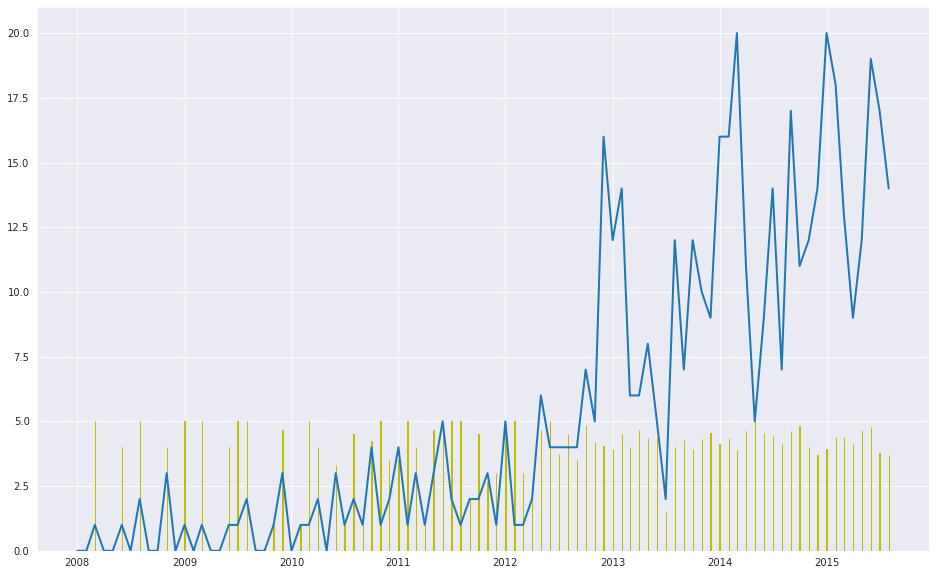

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))
plt.plot(hair_11.index, hair_11['cnt'], lw=2)
plt.bar(hair_11.index, hair_11['ave_score'], edgecolor='y')

In [46]:
from chart_studio.plotly import plot_mpl
result = seasonal_decompose(hair_11['cnt']+1, model = 'multiplicative')
plot_mpl(result.plot())

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



PlotlyRequestError: ignored

In [48]:
from pyramid.arima import auto_arima
model = auto_arima(hair_11['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
print(model.aic)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=424.165, BIC=436.012, Fit time=1.849 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=496.000, BIC=500.739, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=452.557, BIC=462.035, Fit time=0.298 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=423.253, BIC=432.731, Fit time=1.281 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=425.231, BIC=437.079, Fit time=1.477 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=447.216, BIC=454.324, Fit time=0.349 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=425.216, BIC=437.063, Fit time=3.162 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=426.450, BIC=440.666, Fit time=3.524 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=458.437, BIC=465.545, Fit time=0.673 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=424.314, BIC=436.161, Fit time=1.791 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=427.248, BIC=441.464, Fit time=1.194 seconds
Total fit time: 15.627 seconds
<function ARIMA.aic at 0x7ff3d7b63d08>


In [0]:
forecast_11 = model.predict(n_periods=24)
forecast_11 = pd.DataFrame(forecast_11,columns=['Prediction'])
forecast_11.index = pd.date_range('2015-08', '2017-08', freq='M')

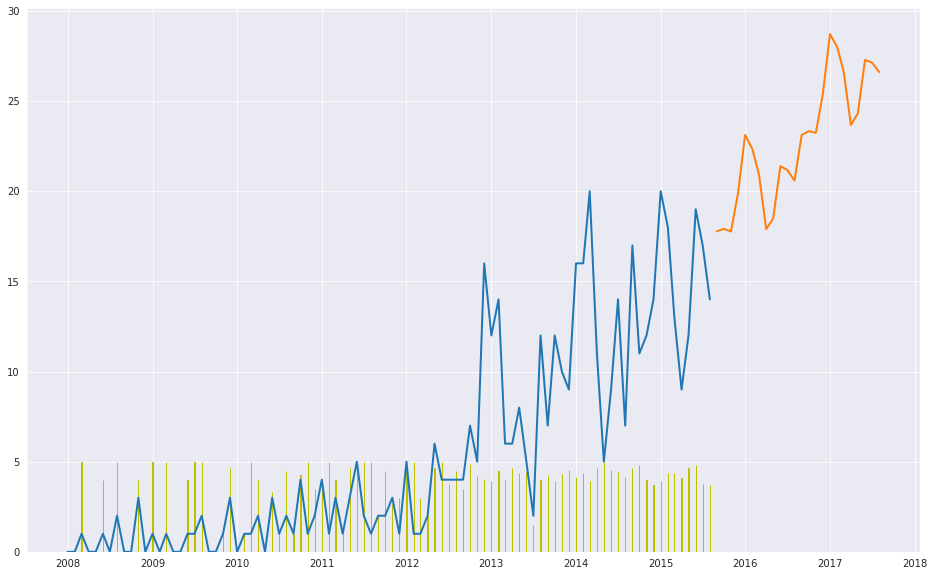

In [63]:
plt.figure(figsize=(16,10))
plt.plot(hair_11.index, hair_11['cnt'], lw=2)
plt.bar(hair_11.index, hair_11['ave_score'], edgecolor='y')
plt.plot(forecast.index, forecast['Prediction'], lw=2, linestyle='-')

In [71]:
hair_88 = pd.read_csv("for_mcm/hair/88.csv")
hair_88.index = pd.to_datetime(hair_88["time"])
model = auto_arima(hair_88['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_88 = model.predict(n_periods=24)
forecast_88 = pd.DataFrame(forecast_88,columns=['Prediction'])
forecast_88.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=419.888, BIC=431.735, Fit time=1.357 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=445.756, BIC=450.495, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=431.109, BIC=440.587, Fit time=0.275 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=418.033, BIC=427.511, Fit time=0.841 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=420.001, BIC=431.849, Fit time=0.775 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=440.227, BIC=447.335, Fit time=0.087 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=419.984, BIC=431.832, Fit time=1.261 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=421.579, BIC=435.795, Fit time=3.623 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=422.036, BIC=429.144, Fit time=0.682 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=419.785, BIC=431.632, Fit time=1.125 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=421.657, BIC=435.873, Fit time=2.177 seconds
Total fit time: 12.228 seconds


In [74]:
hair_244 = pd.read_csv("for_mcm/hair/244.csv")
hair_244.index = pd.to_datetime(hair_244["time"])
model = auto_arima(hair_244['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_244 = model.predict(n_periods=24)
forecast_244 = pd.DataFrame(forecast_244,columns=['Prediction'])
forecast_244[forecast_244["Prediction"]<0] = 0
forecast_244.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=433.868, BIC=445.716, Fit time=0.399 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=469.744, BIC=474.483, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=436.762, BIC=446.239, Fit time=0.281 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=435.246, BIC=444.724, Fit time=0.352 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=434.913, BIC=449.130, Fit time=0.618 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=441.200, BIC=450.677, Fit time=0.096 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=434.377, BIC=448.593, Fit time=1.174 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=436.074, BIC=452.660, Fit time=2.051 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=427.352, BIC=441.569, Fit time=1.149 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=433.779, BIC=445.627, Fit time=0.328 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=436.890, BIC=453.476, Fit time=1.280 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=433.736, BIC=443.214, Fit time=0.259 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=431.296, BIC=450.252, Fit time=2.314 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=428.641, BIC=445.227, Fit time=2.838 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=433.754, BIC=445.601, Fit time=0.673 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=428.318, BIC=444.904, Fit time=3.275 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=430.157, BIC=449.113, Fit time=4.470 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=437.766, BIC=454.353, Fit time=1.067 seconds
Total fit time: 22.652 seconds


In [76]:
hair_258 = pd.read_csv("for_mcm/hair/258.csv")
hair_258.index = pd.to_datetime(hair_258["time"])
model = auto_arima(hair_258['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_258 = model.predict(n_periods=24)
forecast_258 = pd.DataFrame(forecast_258,columns=['Prediction'])
forecast_258[forecast_258["Prediction"]<0] = 0
forecast_258.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=451.448, BIC=463.295, Fit time=0.543 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=493.890, BIC=498.629, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=461.089, BIC=470.566, Fit time=0.313 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=449.522, BIC=459.000, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=448.908, BIC=460.755, Fit time=0.519 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=450.845, BIC=460.323, Fit time=0.245 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=450.803, BIC=465.019, Fit time=3.016 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=473.757, BIC=480.865, Fit time=0.085 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=452.766, BIC=469.352, Fit time=3.331 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=450.868, BIC=465.085, Fit time=0.605 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=472.220, BIC=481.698, Fit time=0.322 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=450.852, BIC=465.069, Fit time=0.641 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=452.832, BIC=469.418, Fit time=1.008 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=450.838, BIC=465.055, Fit time=1.484 seconds
Total fit time: 12.544 seconds


In [77]:
hair_269 = pd.read_csv("for_mcm/hair/269.csv")
hair_269.index = pd.to_datetime(hair_269["time"])
model = auto_arima(hair_269['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_269 = model.predict(n_periods=24)
forecast_269 = pd.DataFrame(forecast_269,columns=['Prediction'])
forecast_269[forecast_269["Prediction"]<0] = 0
forecast_269.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=393.871, BIC=405.719, Fit time=1.492 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=431.435, BIC=436.174, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=402.371, BIC=411.849, Fit time=0.313 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=398.014, BIC=407.492, Fit time=0.445 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=393.425, BIC=407.641, Fit time=1.945 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=395.613, BIC=407.461, Fit time=1.584 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=394.600, BIC=411.186, Fit time=4.763 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=423.552, BIC=433.030, Fit time=0.127 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=396.591, BIC=415.546, Fit time=4.711 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=397.525, BIC=409.372, Fit time=0.442 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=394.473, BIC=411.060, Fit time=2.386 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=401.645, BIC=413.492, Fit time=0.396 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=394.570, BIC=411.157, Fit time=2.096 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=408.222, BIC=417.700, Fit time=0.364 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=396.509, BIC=415.464, Fit time=2.346 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=395.534, BIC=412.120, Fit time=4.157 seconds
Total fit time: 27.597 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [78]:
micro_0 = pd.read_csv("for_mcm/micro/0.csv")
micro_0.index = pd.to_datetime(micro_0["time"])
model = auto_arima(micro_0['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_0 = model.predict(n_periods=24)
forecast_0 = pd.DataFrame(forecast_0,columns=['Prediction'])
forecast_0[forecast_0["Prediction"]<0] = 0
forecast_0.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=249.295, BIC=261.142, Fit time=0.652 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=324.395, BIC=329.134, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=262.599, BIC=272.077, Fit time=0.246 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=248.761, BIC=258.239, Fit time=0.447 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=250.650, BIC=262.497, Fit time=1.607 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=279.803, BIC=286.911, Fit time=0.113 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=250.642, BIC=262.489, Fit time=3.533 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=252.568, BIC=266.784, Fit time=2.000 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=289.197, BIC=296.305, Fit time=0.205 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=249.662, BIC=261.509, Fit time=0.568 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=247.572, BIC=261.788, Fit time=1.410 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=249.366, BIC=265.952, Fit time=1.695 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=276.805, BIC=288.652, Fit time=0.346 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=249.367, BIC=265.953, Fit time=2.940 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=251.419, BIC=270.374, Fit time=3.860 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=248.512, BIC=265.098, Fit time=1.361 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=247.141, BIC=263.727, Fit time=1.272 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=248.914, BIC=267.870, Fit time=2.128 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=276.021, BIC=290.237, Fit time=0.283 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=248.922, BIC=267.877, Fit time=3.159 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 2, 12); AIC=250.953, BIC=272.278, Fit time=2.902 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=250.726, BIC=264.943, Fit time=1.133 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=246.798, BIC=265.753, Fit time=1.402 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=248.658, BIC=269.983, Fit time=3.137 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=270.949, BIC=287.536, Fit time=1.155 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=248.660, BIC=269.985, Fit time=5.625 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 2, 12); AIC=250.696, BIC=274.391, Fit time=6.342 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=247.832, BIC=269.157, Fit time=1.726 seconds
Total fit time: 51.281 seconds


In [79]:
micro_13 = pd.read_csv("for_mcm/micro/13.csv")
micro_13.index = pd.to_datetime(micro_13["time"])
model = auto_arima(micro_13['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_13 = model.predict(n_periods=24)
forecast_13 = pd.DataFrame(forecast_13,columns=['Prediction'])
forecast_13 [forecast_13["Prediction"]<0] = 0
forecast_13.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-92.234, BIC=-80.387, Fit time=1.515 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-7.477, BIC=-2.738, Fit time=0.067 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-45.687, BIC=-36.210, Fit time=0.640 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-94.250, BIC=-84.773, Fit time=1.249 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-92.388, BIC=-80.540, Fit time=1.409 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-55.975, BIC=-48.867, Fit time=0.338 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-92.405, BIC=-80.557, Fit time=2.812 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-90.262, BIC=-76.045, Fit time=3.958 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-47.331, BIC=-40.222, Fit time=0.868 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1,

In [80]:
micro_19 = pd.read_csv("for_mcm/micro/19.csv")
micro_19.index = pd.to_datetime(micro_19["time"])
model = auto_arima(micro_19['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_19 = model.predict(n_periods=24)
forecast_19 = pd.DataFrame(forecast_19,columns=['Prediction'])
forecast_19 [forecast_19["Prediction"]<0] = 0
forecast_19.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-93.412, BIC=-81.565, Fit time=1.547 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-7.477, BIC=-2.738, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-45.687, BIC=-36.210, Fit time=0.595 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-95.414, BIC=-85.936, Fit time=1.115 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-93.720, BIC=-81.873, Fit time=1.799 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-55.982, BIC=-48.874, Fit time=0.401 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-93.741, BIC=-81.893, Fit time=3.773 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-91.470, BIC=-77.253, Fit time=3.730 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-48.127, BIC=-41.019, Fit time=1.081 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1,

In [81]:
micro_35 = pd.read_csv("for_mcm/micro/35.csv")
micro_35.index = pd.to_datetime(micro_35["time"])
model = auto_arima(micro_35['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_35 = model.predict(n_periods=24)
forecast_35 = pd.DataFrame(forecast_35,columns=['Prediction'])
forecast_35 [forecast_35["Prediction"]<0] = 0
forecast_35.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-92.234, BIC=-80.387, Fit time=1.474 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-7.477, BIC=-2.738, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-45.687, BIC=-36.210, Fit time=0.646 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-94.250, BIC=-84.773, Fit time=1.246 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-92.388, BIC=-80.540, Fit time=1.425 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-55.975, BIC=-48.867, Fit time=0.326 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-92.405, BIC=-80.557, Fit time=2.799 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-90.262, BIC=-76.045, Fit time=3.917 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-47.331, BIC=-40.222, Fit time=0.846 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1,

In [82]:
micro_40 = pd.read_csv("for_mcm/micro/40.csv")
micro_40.index = pd.to_datetime(micro_40["time"])
model = auto_arima(micro_40['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_40 = model.predict(n_periods=24)
forecast_40 = pd.DataFrame(forecast_40,columns=['Prediction'])
forecast_40 [forecast_40["Prediction"]<0] = 0
forecast_40.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-92.234, BIC=-80.387, Fit time=1.479 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-7.477, BIC=-2.738, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-45.687, BIC=-36.210, Fit time=0.644 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-94.250, BIC=-84.773, Fit time=1.247 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-92.388, BIC=-80.540, Fit time=1.426 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-55.975, BIC=-48.867, Fit time=0.337 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-92.405, BIC=-80.557, Fit time=2.799 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-90.262, BIC=-76.045, Fit time=3.908 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-47.331, BIC=-40.222, Fit time=0.852 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1,

In [84]:
baby_1131 = pd.read_csv("for_mcm/baby/1131.csv")
baby_1131.index = pd.to_datetime(baby_1131["time"])
model = auto_arima(baby_1131['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_1131 = model.predict(n_periods=24)
forecast_1131 = pd.DataFrame(forecast_1131,columns=['Prediction'])
forecast_1131 [forecast_1131["Prediction"]<0] = 0
forecast_1131.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(0, 0, 0); AIC=nan, BIC=nan, Fit time=0.014 seconds
Total fit time: 0.015 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:403: UserWarning:

Input time-series is completely constant; returning a (0, 0, 0) ARMA.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:811: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:811: RuntimeWarning:

invalid value encountered in double_scalars

